In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
#import tensorflow_addons as tfa

#Загрузка данных
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

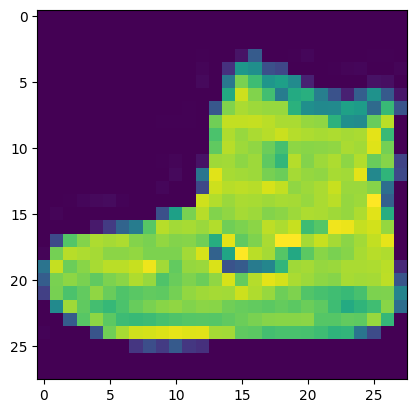

In [2]:
plt.imshow(x_train[0])

In [3]:
# Нормализация данных
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [4]:
#Создание нейронной сети
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (4,4), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
# Компиляция модели
model.compile(loss="sparse_categorical_crossentropy", optimizer = Adam(learning_rate=1e-3), metrics = ["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 804778 (3.07 MB)
Trainable params: 804778 (3.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [5]:
#Обучение сети
his = model.fit(x_train, y_train, batch_size = 200, epochs = 10, validation_split=0.2, verbose = 1)


Epoch 1/5
240/240 [==============================] - 8s 30ms/step - loss: 2.0744 - accuracy: 0.8127 - val_loss: 0.3988 - val_accuracy: 0.8642
Epoch 2/5
240/240 [==============================] - 7s 29ms/step - loss: 0.3225 - accuracy: 0.8878 - val_loss: 0.3716 - val_accuracy: 0.8706
Epoch 3/5
240/240 [==============================] - 8s 31ms/step - loss: 0.2552 - accuracy: 0.9093 - val_loss: 0.3278 - val_accuracy: 0.8861
Epoch 4/5
240/240 [==============================] - 7s 30ms/step - loss: 0.2080 - accuracy: 0.9246 - val_loss: 0.3181 - val_accuracy: 0.8972
Epoch 5/5
240/240 [==============================] - 7s 29ms/step - loss: 0.1832 - accuracy: 0.9342 - val_loss: 0.3219 - val_accuracy: 0.8943


In [6]:
# предсказанные данные
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [7]:
# Accuracy
def Accuracy(y_test = y_test, y_pred = y_pred):
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    y_pred = tf.keras.utils.to_categorical(y_pred, 10)
    accuracy = tf.keras.metrics.Accuracy(name = 'accuracy', dtype = None)
    accuracy.update_state(y_true = y_test, y_pred= y_pred)
    print(f"Accuracy total = {accuracy.result().numpy() /1:.4f}")
Accuracy()
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Precision
precision = tf.keras.metrics.Precision(thresholds = None, top_k = None, class_id = None, name = None, dtype = None)
precision.update_state(y_true = y_test, y_pred= y_pred)
print(f"Precision total = {precision.result().numpy() /1:.4f}")
#print(f"Precision = {precision}")
# Recall
recall = tf.keras.metrics.Recall(thresholds = None, top_k = None, class_id = None, name = None, dtype = None)
recall.update_state(y_true = y_test, y_pred= y_pred)
print(f"Recall total = {recall.result().numpy() /1:.4f}")
# f1-Score
f1 = 2 * (precision.result().numpy() * recall.result().numpy()) / (precision.result().numpy() + recall.result().numpy())
print(f"f1-Score total = {f1 /1:.4f}")


Accuracy total = 0.9826
Precision total = 0.9012
Recall total = 0.8833
f1-Score total = 0.8922


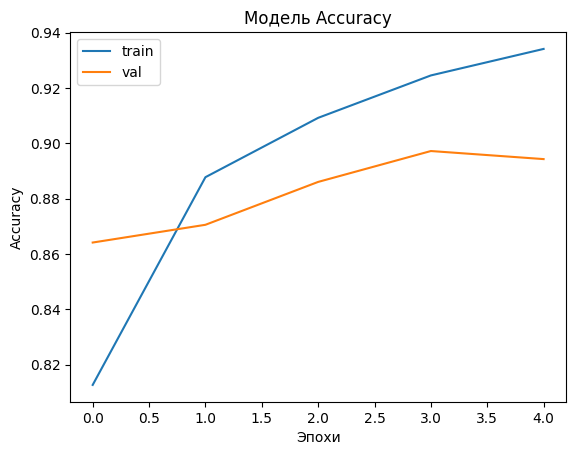

In [8]:
plt.plot(his.history["accuracy"])
plt.plot(his.history["val_accuracy"])
plt.title("Модель Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Эпохи")
plt.legend(["train", "val"], loc="upper left")
plt.show()